In [1]:
import numpy as np
import matplotlib.pyplot as plt
from hmm import continuous_observation_HMM as cHMM

import os, sys
parentPath = os.path.abspath("..")
if parentPath not in sys.path:
    sys.path.insert(0, parentPath)
import utils

In [2]:
S = 3 #number of states
O = 2 #number of possible observations
A = np.zeros((S,S))
C = np.array([[-2,0,2],[-2,0,2]])
R = np.eye(2)
p0 = np.ones(S)/S
for i in range(S):
    for j in range(S):
        if i == j:
            A[i,j] = 0.9
        else:
            A[i,j] = 0.1/(S-1)

In [3]:
print A
print C
print p0

[[0.9  0.05 0.05]
 [0.05 0.9  0.05]
 [0.05 0.05 0.9 ]]
[[-2  0  2]
 [-2  0  2]]
[0.33333333 0.33333333 0.33333333]


In [4]:
A[:,1]

array([0.05, 0.9 , 0.05])

In [5]:
hmm = cHMM(A,C,R,p0,S,O)

In [6]:
states,observations = hmm.generate_data(100)

In [7]:
print states
print observations

[1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]
[array([0.64274968, 0.05623873]), array([ 1.29289441, -0.03073946]), array([-1.66692823, -1.37868333]), array([-2.52253694, -3.32067258]), array([-2.05784968, -2.12953648]), array([-0.55112748, -1.44033205]), array([-1.39908444, -0.27490657]), array([-3.15116296, -3.14168633]), array([-1.13150966,  1.77285195]), array([0.01468623, 2.04867371]), array([-0.89346328, -1.27025388]), array([-4.40640576, -1.94557295]), array([-2.07631501, -0.16600821]), array([0.49763012, 1.99084795]), array([ 1.42488683, -0.07832918]), array([-0.03997027, -0.18156884]), array([-1.41574455, -1.46965307]), array([-1.97240519, -2.4053163 ]), array([-3.10492286, -1.74230674]), array([-2.08986434, -0.64992568]), arra

In [8]:
t = range(100)

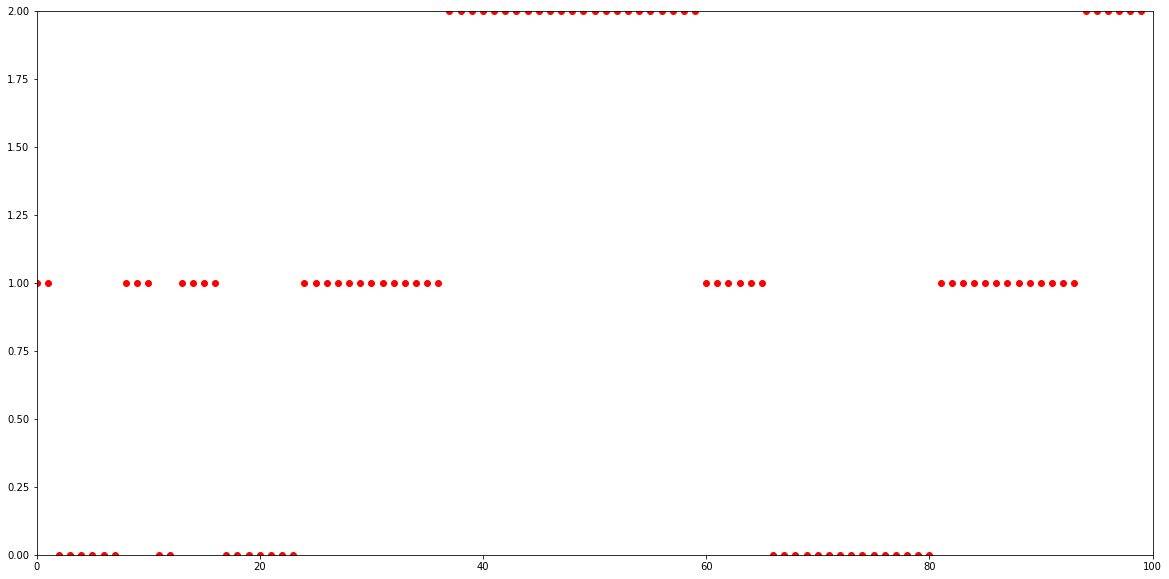

In [9]:
plt.figure(figsize=(20,10))
plt.plot(t, states, 'ro')
plt.axis([0,100,0,2])
plt.show()

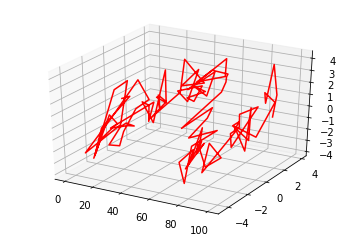

In [10]:
obs1_draw = []
obs2_draw = []
for obs in observations:
    obs1_draw.append(obs[0])
    obs2_draw.append(obs[1])
    
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 100, 100)
ax.plot3D(zline, obs1_draw, obs2_draw, 'r')

In [11]:
update, predict = hmm.forward_pass(observations)

In [12]:
update.shape

(3, 100)

In [13]:
def norm_deneme(log_x):
    return np.exp(log_x - np.max(log_x,axis=0))/np.exp(log_x - np.max(log_x,axis=0)).sum(axis=0).reshape(1,log_x.shape[1])

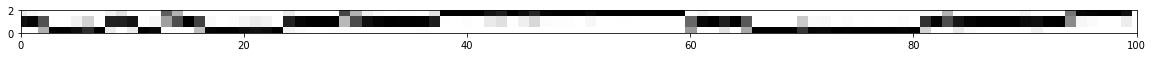

In [14]:
alfa = utils.normalize_exp(update)
#alfa = norm_deneme(update)
plt.figure(figsize=(20,10))
plt.imshow(alfa, interpolation='nearest', cmap='gray_r')
plt.axis([0,100,2,0])
plt.gca().invert_yaxis()
plt.show()

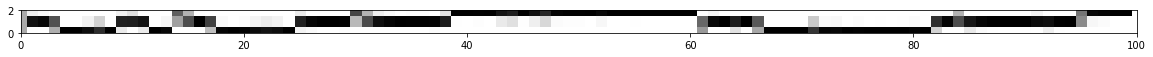

In [15]:
alfa = utils.normalize_exp(predict)
plt.figure(figsize=(20,10))
plt.imshow(alfa, interpolation='nearest', cmap='gray_r')
plt.axis([0,100,2,0])
plt.gca().invert_yaxis()
plt.show()

In [16]:
_, postdict = hmm.backward_pass(observations)

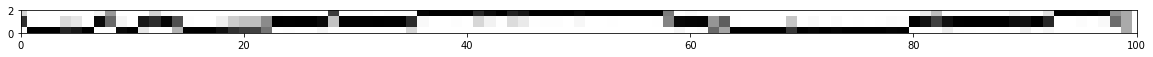

In [17]:
beta = utils.normalize_exp(postdict)
plt.figure(figsize=(20,10))
plt.imshow(beta, interpolation='nearest', cmap='gray_r')
plt.axis([0,100,2,0])
plt.gca().invert_yaxis()
plt.show()

In [18]:
log_gamma = hmm.forward_backward(observations)

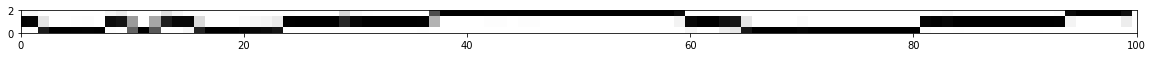

In [19]:
gamma = utils.normalize_exp(log_gamma)
#gamma = norm_deneme(log_gamma)
plt.figure(figsize=(20,10))
plt.imshow(gamma, interpolation='nearest', cmap='gray_r')
plt.axis([0,100,2,0])
plt.gca().invert_yaxis()
plt.show()

In [20]:
max_path = hmm.viterbi(observations)

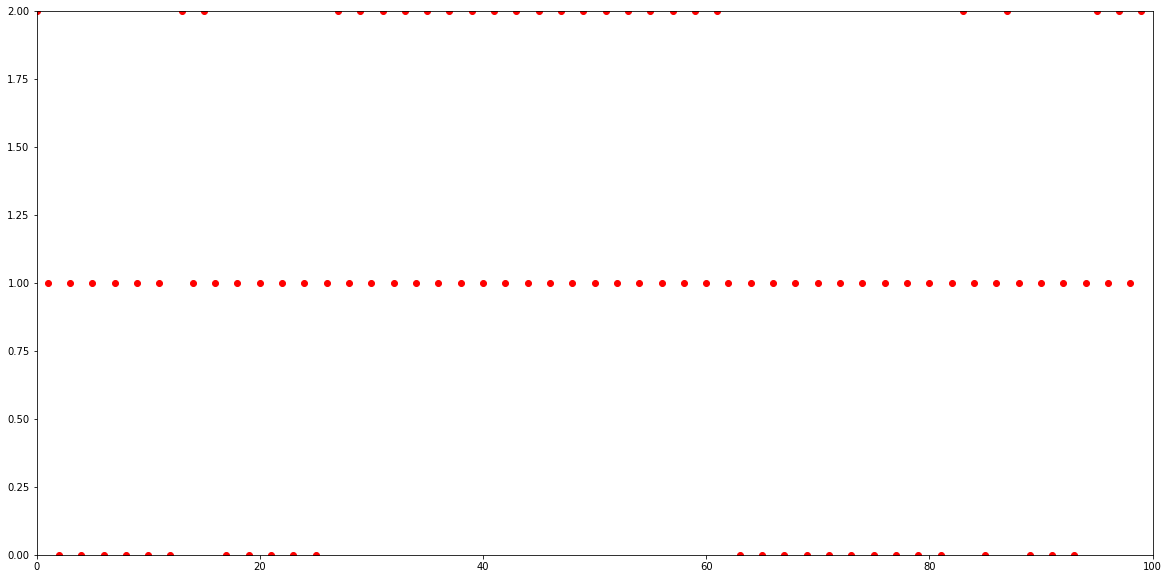

In [21]:
plt.figure(figsize=(20,10))
plt.plot(t, max_path, 'ro')
plt.axis([0,100,0,2])
plt.show()

In [22]:
_,y = hmm.generate_data(500)

In [23]:
A_estimated, C_estimated, R_estimated, pi_estimated = hmm.parameter_estimation_em(y,50)

In [24]:
print A_estimated

[[0.92364218 0.03594688 0.00373622]
 [0.02927251 0.87878829 0.06509817]
 [0.0470853  0.08526483 0.93116561]]


In [25]:
print C_estimated

[[-0.18620666  1.97904235 -1.68263796]
 [-0.02706833  2.05206381 -1.79756618]]


In [26]:
print R_estimated

[[1.09507561 0.03274409]
 [0.03274409 1.0936909 ]]


In [27]:
print pi_estimated

[4.0722106e-023 1.0000000e+000 7.1674786e-239]


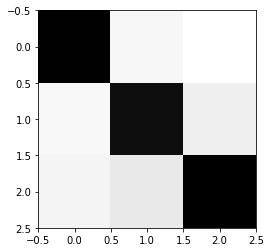

In [28]:
plt.imshow(A_estimated, cmap=plt.cm.binary)
plt.show()